# Decision Tree Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Note matplotlib needs Pillow installed to import jpg and bmp images
import matplotlib.image as mi
from sklearn import tree
%matplotlib inline

In [2]:
def train(filel, fileu):
    # @Param file1 string with name of labelled image
    # @Param fileu string with name of unlabelled image
    
    # Read in labelled and unlabelled image, and reshape so that the matrices represent a list of RGB tuples
    lab = mi.imread(filel)
    unl = mi.imread(fileu)
    lab = np.reshape(lab, (-1, 3))
    unl = np.reshape(unl, (-1, 3))

    # find mask of pixels that represent the painted elements in the labelled image
    b = np.logical_and(np.logical_and(lab[:,0] == 255, lab[:,1] == 0) , lab[:,2] == 255) 
    # find on (painted) and off (not painted) pixels
    on = unl[b,:]
    s1 = on.shape[0]
    # Set desired output of all on pixels to 1
    onOut = np.ones((s1,1)).astype(np.float64);
    off = unl[~b,:]
    s2 = off.shape[0]
    # Set desired output of all off pixels to 0
    offOut =np.zeros((s2,1)).astype(np.float64)

    # Concatenate samples and outputs
    X = np.concatenate((on, off));
    Y = np.concatenate( (onOut, offOut) )

    # Training
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X,Y);
    
    return clf;

def classify(I, cl):
    # @Param I numpy array of image to be classified (See cv2, Pillow, or Matplotlib.image)
    # @Param cl classifier output from train function
    origshape = I.shape;
    pixels = np.reshape(I, (-1, 3))
    out = cl.predict(pixels)
    ret = np.reshape(out, (origshape[0], origshape[1]))
    return ret;

In [3]:
cl = train('labelled1.bmp','unlabelled1.jpg');

In [4]:
fileu = 'unlabelled2.jpg'
I = mi.imread(fileu)
# Tweak the threshold value as you see fit
m = classify(I, cl)

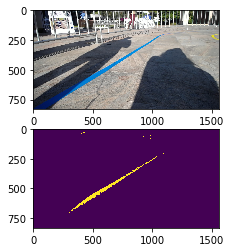

In [5]:
plt.subplot(2,1,1);
plt.imshow(I)
plt.subplot(2,1,2);
plt.imshow(m)

## Note
I've never actually used this one before, a Robotics lecturer last year alluded to this and was saying that this was a good way to do some colour classification

## Improvements
* Use HSV or LUV or etc
* edit to use multiple images
* store the cassifier to hard storage
    * python pickles? not sure if this is actually possible (I've never pickled a classifier)
* etc etc